In [52]:
import time

start_time = time.time()

### Importações das Bibs Necessárias


In [53]:
from Bio import SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO
import matplotlib.pyplot as plt
import os
# import tempfile

### Leitura das Sequências

Recebe o path do arquivo fasta e retorna array com sequências


In [54]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

def read_sequences(gene_file_path):
    gene_sequences = []
    seq_counter = 1

    with open(gene_file_path) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            # Criar um nome único para cada sequência
            unique_name = f"seq_{seq_counter}"
            seq_counter += 1

            # Criar um objeto SeqRecord com a sequência e informações adicionais
            seq_record = SeqRecord(record.seq, id=unique_name, name=unique_name,
                                   description=record.description)
            # Adicionar o objeto SeqRecord à lista
            gene_sequences.append(seq_record)

    number_sequences = len(gene_sequences)
    print('number of sequences in file', gene_file_path, ' = ', number_sequences)
    return gene_sequences


### Alinhamento Múltiplo

Recebe as sequências genicas e realiza o alinhamento com o ClutalOmega


In [55]:
def perform_alignment(sequences):
    input_file = "input.fasta"
    output_file = "output.fasta"

    # Salva as sequências em um arquivo temporário
    SeqIO.write(sequences, input_file, "fasta")

    # Executa o alinhamento com Clustal Omega
    clustalomega_cline = ClustalOmegaCommandline(
        infile=input_file, outfile=output_file, verbose=True, auto=True)
    clustalomega_cline()

    # Lê o arquivo de saída do alinhamento
    alignment = AlignIO.read(output_file, "fasta")

    # Remove o arquivo temporário
    os.remove(input_file)

    return alignment

### Visualização dos Resultados

In [56]:
def visualize_alignment(alignment):
    # Calcula o percentual de identidade para cada posição do alinhamento
    identity_percentages = []
    for column in range(alignment.get_alignment_length()):
        column_data = alignment[:, column]
        identity_percentage = column_data.count(column_data[0]) / len(column_data) * 100
        identity_percentages.append(identity_percentage)

    # Plota o gráfico de percentual de identidade
    plt.plot(identity_percentages)
    plt.xlabel("Position")
    plt.ylabel("Identity Percentage")
    plt.title("Identity Percentage by Position")
    plt.show()



### Main


number of sequences in file /home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.2/gene_spike.fasta  =  117


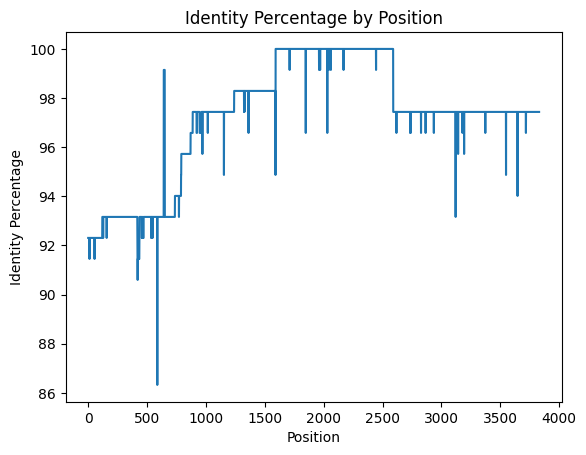

Busca Completa Concluída.


In [57]:
# Caminho para o arquivo com os genes
gene_file_path = "/home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.2/gene_spike.fasta"

# Realiza a leitura das sequências
gene_sequences = read_sequences(gene_file_path)

# Realiza o sequenciamento múltiplo com o Clustal Omega
alignment = perform_alignment(gene_sequences)

visualize_alignment(alignment)

print('Busca Completa Concluída.')

In [58]:
from datetime import datetime

end_time = time.time()

elapsed_time = end_time - start_time
current_datetime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

print(elapsed_time)
print(current_datetime)

1832.110979795456
2023-07-16 22:47:30


          a         c         g     k    m     n     r         t     y
a 7233282.0       0.0    1301.0   0.0  0.0 282.5 110.5     217.5   0.0
c       0.0 4648282.0     163.5   0.0 57.0 563.5   0.0     774.5 113.0
g    1301.0     163.5 4514405.0  58.0  0.0  56.5  55.5     773.5   0.0
k       0.0       0.0      58.0   6.0  0.0   0.0   0.0     278.0   0.0
m       0.0      57.0       0.0   0.0  0.0   0.0   0.0       0.0   0.0
n     282.5     563.5      56.5   0.0  0.0   3.0   0.0     452.0   0.0
r     110.5       0.0      55.5   0.0  0.0   0.0   0.0       0.0   0.0
t     217.5     774.5     773.5 278.0  0.0 452.0   0.0 8130778.0  56.5
y       0.0     113.0       0.0   0.0  0.0   0.0   0.0      56.5   0.0



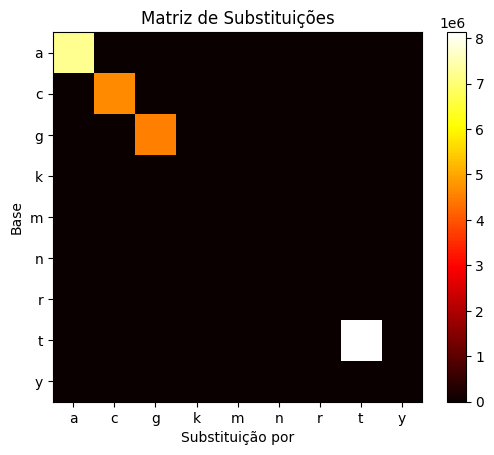

In [64]:
import numpy as np

print(alignment.substitutions)

# Obter a matriz de substituições do alinhamento
substitutions = alignment.substitutions

# Lista com as bases representadas na matriz
bases = ['a', 'c', 'g', 'k', 'm', 'n', 'r', 't', 'y']

# Cria o heatmap
plt.imshow(substitutions, cmap='hot', interpolation='nearest')
plt.colorbar()

# Define os rótulos dos eixos x e y com as bases
plt.xticks(np.arange(len(bases)), bases)
plt.yticks(np.arange(len(bases)), bases)

# Exibe o gráfico
plt.xlabel('Substituição por')
plt.ylabel('Base')

plt.title('Matriz de Substituições')

plt.show()

In [ ]:
output_alinhamento = "/home/maume/UnEB/TCC/Dataset/sequencias_teste_bkp/A.2/alinhamento.fasta"
with open(output_alinhamento, "w") as f:
        AlignIO.write(alignment, f, "fasta")

### Salvando Informações Sobre a Execução

In [59]:
# import platform
# import psutil

# machine_info = platform.uname()
# memory_info = psutil.virtual_memory()

# path_directory = '/home/maume/UnEB/TCC/Implementation/pipeline_BLAST'

# content = '============================================================\n'
# content += 'Informações Sobre a Última Execução:\n\n'
# content += f'- Quantidade de Variantes Analisadas: {files_processed}\n'
# content += f'- Quantidade de Genomas Analisados: {sequences_processed}\n'
# content += f'- Quantidade de Genomas em que o Gene não foi Encontrado: {genes_not_found}\n'
# content += f'- Data e Hora da Execução: {current_datetime}\n'
# content += f'- Tempo Total de Execução: {round(elapsed_time, 2)} Segundos\n'
# content += f'- Caminho do Dataset Utilizado: {root_directory}\n'
# content += f'\nInformações Sobre a Máquina Utilizada\n\n'
# content += f'- S.O.: Ubuntu 22.04.2 LTS x86_64\n'
# content += f'- Kernel: {machine_info.release}\n'
# content += f'- CPU: Intel i7-6500U (4) @ 3.100GHz {machine_info.processor}\n'
# content += f'- Total de Memória: {round(memory_info.total / (1024 ** 3), 2)}GB\n'


# output_file_name = 'execution_information.txt'
# output_file_path = os.path.join(path_directory, output_file_name)

# with open(output_file_path, 'a') as output_file:
#     output_file.write(content)

# print(f'Information saved to file: {output_file_path}')